In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Figure 3 training process

In [2]:
rDNN,valDNN = np.load('./Results/MLP_net/model/v3/model_train_r1.npy').tolist(), np.load('./Results/MLP_net/model/v3/model_train_val1.npy').tolist()
rDLEDMD,valDLEDMD = np.load('./Results/DLEDMD_net/model/v3/model_train_r1.npy').tolist(), np.load('./Results/DLEDMD_net/model/v3/model_train_val1.npy').tolist()

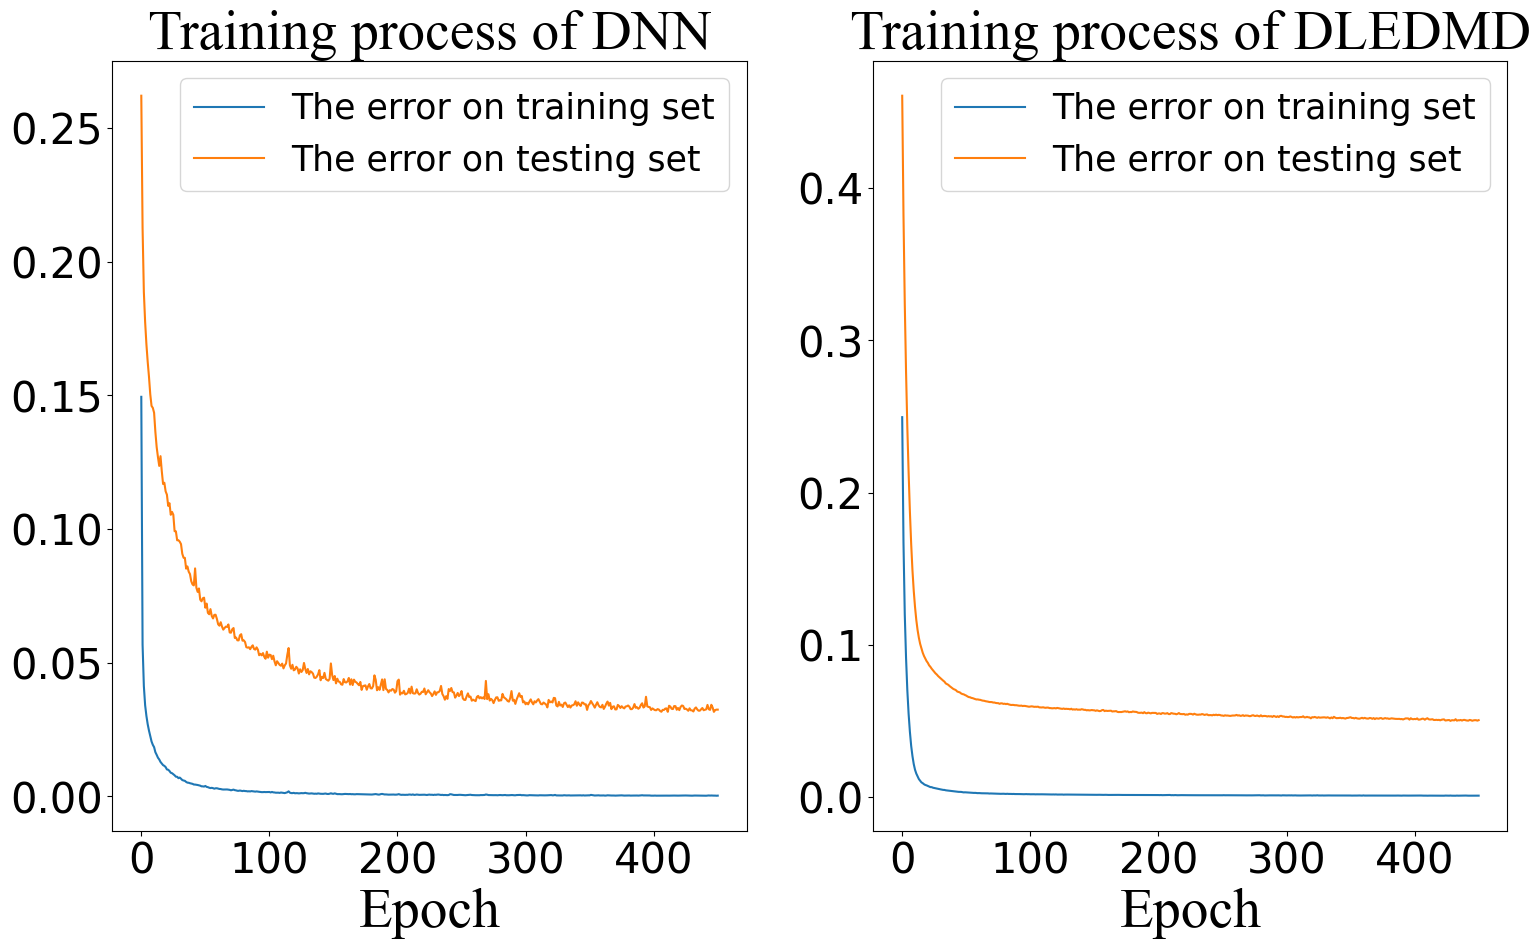

In [6]:
figs,axes=plt.subplots(1,2,figsize=(18,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
font1={'family':'Times New Roman',
           'size':40}
font2={'family':'Times New Roman',
           'size':40}

axes[0].set_title('Training process of DNN',font=font2)
axes[0].plot(rDNN,label='The error on training set')
axes[0].plot(valDNN,label='The error on testing set')
axes[0].legend(fontsize=25)
axes[0].tick_params(labelsize=30)
axes[0].set_xlabel('Epoch',font=font1)

axes[1].set_title('Training process of DLEDMD',font=font2)
axes[1].plot(rDLEDMD,label='The error on training set')
axes[1].plot(valDLEDMD,label='The error on testing set')
axes[1].legend(fontsize=25)
axes[1].tick_params(labelsize=30)
axes[1].set_xlabel('Epoch',font=font1)

figs.savefig('./Fig3_training.tif',dpi=200)

# Figure 4 simulation results

In [7]:
import data_process as dp

In [8]:
YDNN=np.load('./Results/MLP_net/predict/v3/prediction.npy')
YDLEDMD=np.load('./Results/DLEDMD_net/predict/v3/prediction.npy')
Y=np.load('./tem_data/v3/oTest_out.npy')

omax=np.load('./tem_data/oDatamax.npy')
omin=np.load('./tem_data/oDatamin.npy')

Y_DNN=dp.renormalize_F(YDNN,omax,omin)
Y_DLEDMD=dp.renormalize_F(YDLEDMD,omax,omin)
Y_=dp.renormalize_F(Y,omax,omin)

data=pd.read_csv('data.csv')

## MSE and NSE

In [10]:
dnnmse,dnnnse=[],[]
dledmdmse,dledmdnse=[],[]
for i in range(Y.shape[1]):
    dnnmse.append(np.sqrt(np.mean(np.square(Y_DNN[:,i]-Y_[:,i]))))
    dledmdmse.append(np.sqrt(np.mean(np.square(Y_DLEDMD[:,i]-Y_[:,i]))))

    dnnnse.append(1-(np.sum(np.square(Y_DNN[:,i]-Y_[:,i])))/(np.sum(np.square(Y_[:,i]-np.mean(Y_[:,i])))))
    dledmdnse.append(1-(np.sum(np.square(Y_DLEDMD[:,i]-Y_[:,i])))/(np.sum(np.square(Y_[:,i]-np.mean(Y_[:,i])))))

In [58]:
dledmdnse

[0.9983125374968562,
 0.9954564932248747,
 0.9934032575547059,
 0.9980486643497359,
 0.9952819649491477]

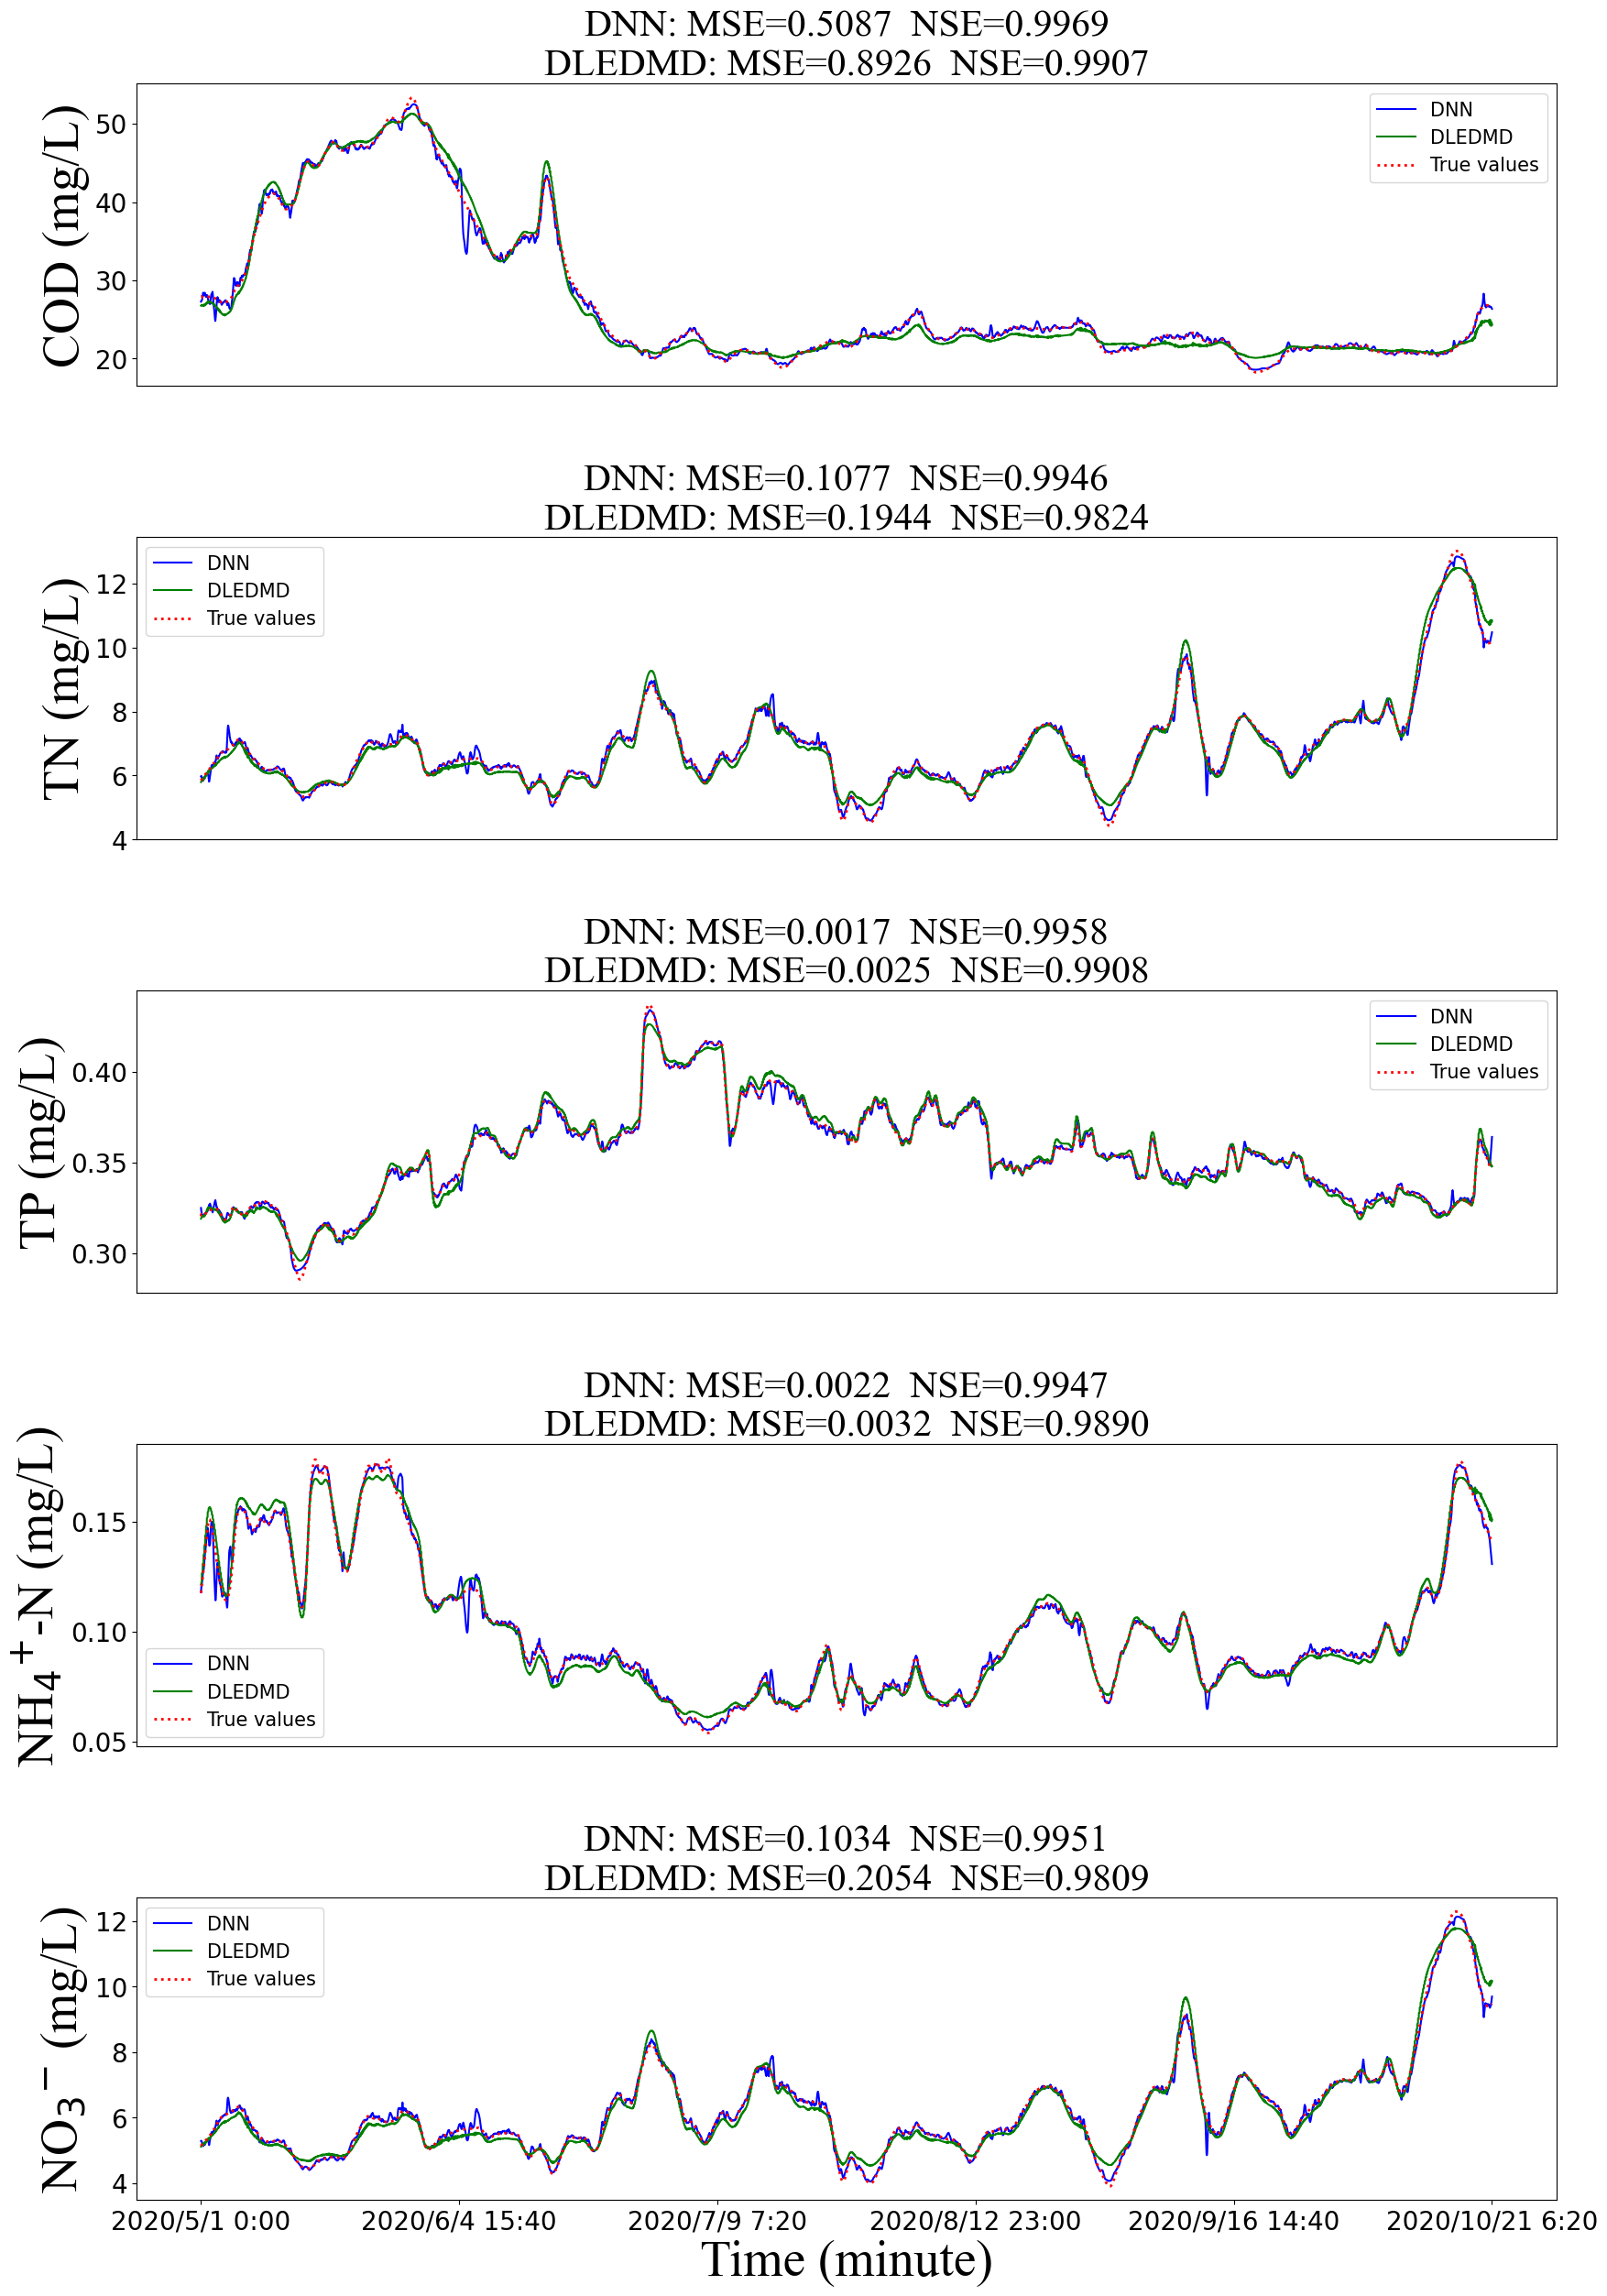

In [11]:
figs,axes=plt.subplots(5,1,figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
font1={'family':'Times New Roman',
           'size':40}
font2={'family':'Times New Roman',
           'size':30}

name_list=['COD (mg/L)','TN (mg/L)','TP (mg/L)','NH'+'$_{4}$'+'$^{+}$'+'-N (mg/L)','NO'+'$_{3}$'+'$^{-}$'+' (mg/L)']

for i in range(len(name_list)):
    axes[i].plot(Y_DNN[:,i],'b',label='DNN')
    axes[i].plot(Y_DLEDMD[:,i],'g',label='DLEDMD')
    axes[i].plot(Y_[:,i],'r:',linewidth =2.0, label='True values')
    axes[i].legend(fontsize=15)
    axes[i].tick_params(labelsize=20)
    axes[i].set_ylabel(name_list[i],font=font1)
    axes[i].set_title('DNN: MSE='+str(dnnmse[i])[:6]+' '+' NSE='+str(dnnnse[i])[:6]+'\n'+'DLEDMD: MSE='+str(dledmdmse[i])[:6]+' '+' NSE='+str(dledmdnse[i])[:6],font=font2)
    if i == 4:
        axes[i].set_xlabel('Time (minute)',font=font1)
        axes[i].set_xticks(np.arange(0,Y.shape[0],int(Y.shape[0]/5)),data['日期'].iloc[np.arange(0,Y.shape[0],int(Y.shape[0]/5))].values)
    else:
        axes[i].set_xticks([])

figs.savefig('./Fig4_predict.tif',bbox_inches='tight',dpi=200)

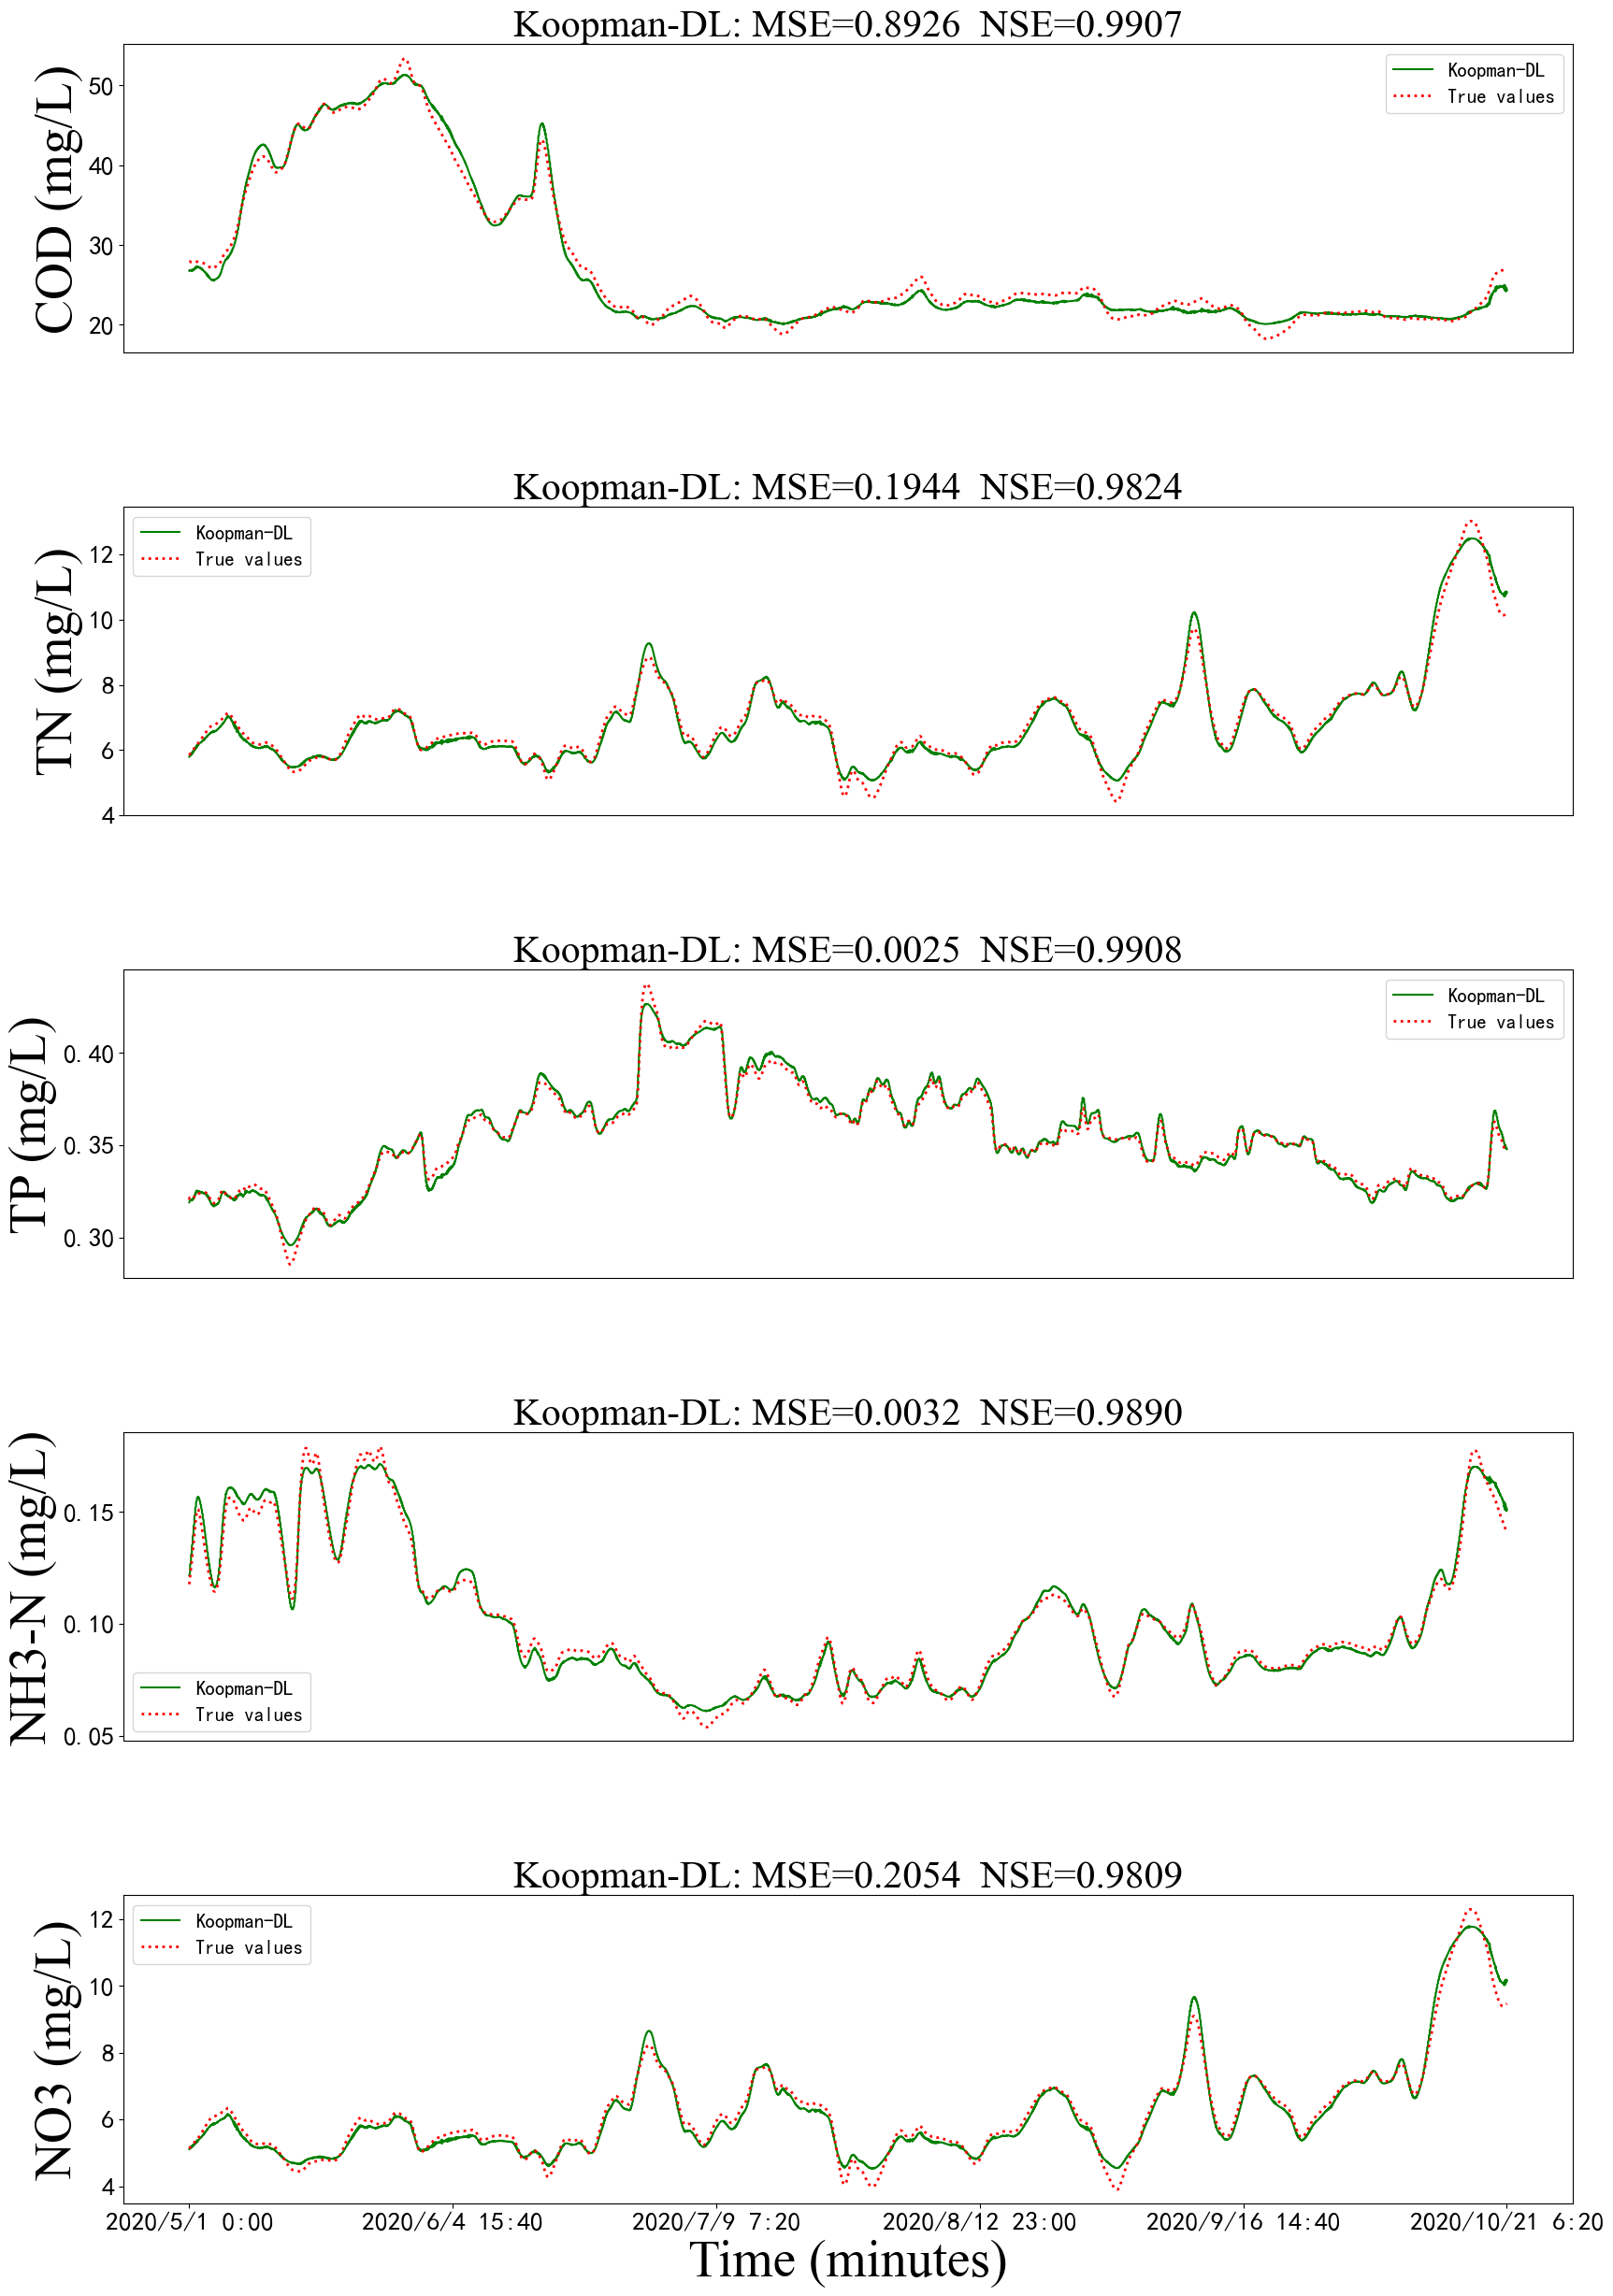

In [9]:
# For 专利
plt.rcParams['font.sans-serif']=['SimHei']
figs,axes=plt.subplots(5,1,figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
font1={'family':'Times New Roman',
           'size':40}
font2={'family':'Times New Roman',
           'size':30}

name_list=['COD (mg/L)','TN (mg/L)','TP (mg/L)','NH3-N (mg/L)','NO3 (mg/L)']

for i in range(len(name_list)):
    #axes[i].plot(Y_DNN[:,i],'b',label='DNN')
    axes[i].plot(Y_DLEDMD[:,i],'g',label='Koopman-DL')
    axes[i].plot(Y_[:,i],'r:',linewidth =2.0, label='True values')
    axes[i].legend(fontsize=15)
    axes[i].tick_params(labelsize=20)
    axes[i].set_ylabel(name_list[i],font=font1)
    axes[i].set_title('Koopman-DL: MSE='+str(dledmdmse[i])[:6]+' '+' NSE='+str(dledmdnse[i])[:6],font=font2)
    if i == 4:
        axes[i].set_xlabel('Time (minutes)',font=font1)
        axes[i].set_xticks(np.arange(0,Y.shape[0],int(Y.shape[0]/5)),data['日期'].iloc[np.arange(0,Y.shape[0],int(Y.shape[0]/5))].values)
    else:
        axes[i].set_xticks([])

figs.savefig('./Fig专利.tif',bbox_inches='tight',dpi=200)